# DME project - Collaborative filtering section
Note: This notebook is adapted from https://github.com/Slowika/Bag-of-Recipes

In [ ]:
# Install required packages
!pip install -q -r requirements.txt

In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sklearn

from sklearn.decomposition import PCA
import time

from sklearn.model_selection import train_test_split
from recommendation_evaluation_functions import recommend_ingredients, held_out_recommendation, calculate_metrics

%matplotlib inline

# Import data

In [5]:
# Get datasets

X, cuisines_df = gr.get_data()

In [6]:
cuisines_ids = X.pop('cuisine')
X.head()


,acorn_squash,adobo,african_birdseye_chile_pepper,ale,aleppo_pepper,alfalfa_sprouts,alfredo_sauce,allspice,almond,almond_butter,...,yams,yeast,yellow_curry_paste,yellow_food_coloring,yellow_split_pea,yellow_squash,yogurt,zaatar,zest,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
cuisines = pd.merge(cuisines_ids, cuisines_df, how='left').drop('cuisine', axis=1)
cuisines.set_index(X.index, inplace=True)
cuisines.head()

,cuisine_name
0,Chinese
1,Chinese
2,Chinese
3,Chinese
4,Chinese


# Model evaluation

## Split the data into train and test set

In [9]:
X_train, X_test = train_test_split(X, test_size=0.8, random_state=42)

## Tune alpha parameter cosine similarity

In [10]:
# Initialise dataframe of results
results_alpha_PCA = pd.DataFrame(columns = ["k", "similarity_measure", "recall10", "mean_rank", 
                                            "median_rank"])

alpha_grid = np.linspace(0.05,0.35,7)
user_item_matrix = X_train

# Fix number of neighbours to 50 and use PCA to evaluate (roughly) the optimal value of alpha
model_config = [50, "asymmetric_cosine", len(X.columns)]

for alpha in alpha_grid:   
    
    missing_ingredients, recommendations = held_out_recommendation(user_item_matrix, model_config, usePCA=True,
                                                                   alpha = alpha)  
    for k, recs in recommendations.items():
        results_alpha_PCA = results_alpha_PCA.append(calculate_metrics(missing_ingredients, recs, 
                                                                       model_config[0],  
                                                                       model_config[1]),ignore_index=True)

In [11]:
results_alpha_PCA

,k,similarity_measure,recall10,mean_rank,median_rank
0,[50],asymmetric_cosine,0.597403,54.1983,6
1,[50],asymmetric_cosine,0.597403,51.9481,6
2,[50],asymmetric_cosine,0.593861,46.7839,6
3,[50],asymmetric_cosine,0.59268,46,6
4,[50],asymmetric_cosine,0.598583,41.5455,6
5,[50],asymmetric_cosine,0.596222,39.7898,6
6,[50],asymmetric_cosine,0.600945,36.294,6


## Without PCA

In [6]:
start_time = time.time()
results = pd.DataFrame(columns=["k", "similarity_measure", "recall10", "mean_rank", "median_rank"])

k_grid              = [10, 20, 50, 100, 150, 200]
similarity_measures = ["cosine", "asymmetric_cosine", "jaccard", "pmi"]
n_recommendations   = len(X.columns)
user_item_matrix  = X_train

for sim in similarity_measures:
    
    model_config = [k_grid, sim, n_recommendations]
    missing_ingredients, recommendations = held_out_recommendation(user_item_matrix, model_config)
    
    for k, recs in recommendations.items():
        results = results.append(calculate_metrics(missing_ingredients, recs, k, sim), 
                                 ignore_index = True)    

print("--- %s minutes ---" % (round( (time.time() - start_time)/60, 3)))
results.to_csv('results/parameter_settings_train.csv', sep = '\t')

stead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  pmi.values[[range(pmi.shape[0])]*2] = 0 # Set self-PMI to zero.
x:\DME\Bag-of-Recipes-master\similarity_functions.py:68: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  pmi.values[[range(pmi.shape[0])]*2] = 0 # Set self-PMI to zero.
x:\DME\Bag-of-Recipes-master\similarity_functions.py:68: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  pmi.values[[range(pmi.shape[0])]*2] = 0 # Set s

In [7]:
results

,k,similarity_measure,recall10,mean_rank,median_rank
0,10,cosine,0.330579,78.252656,23
1,20,cosine,0.311688,72.293979,22
2,50,cosine,0.107438,73.775679,36
3,100,cosine,0.025974,91.374262,59
4,150,cosine,0.024793,105.722550,81
5,200,cosine,0.024793,115.731995,96
6,10,asymmetric_cosine,0.000000,410.035419,404
7,20,asymmetric_cosine,0.000000,410.035419,404
8,50,asymmetric_cosine,0.000000,410.035419,404
9,100,asymmetric_cosine,0.000000,410.035419,404


## Same settings, with PCA

In [14]:
start_time = time.time()
results_PCA = pd.DataFrame(columns = ["k", "similarity_measure", "recall10", "mean_rank", "median_rank"])

k_grid              = [10, 20, 50, 100, 150, 200]
similarity_measures = ["cosine", "asymmetric_cosine", "jaccard", "pmi"]
n_recommendations   = len(X.columns)
user_item_matrix  = X_train

for sim in similarity_measures:
    
    model_config = [k_grid, sim, n_recommendations]
    missing_ingredients, recommendations = held_out_recommendation(user_item_matrix, model_config, usePCA = True)
    
    for k, recs in recommendations.items():
        results_PCA = results_PCA.append(calculate_metrics(missing_ingredients, recs, k, sim), 
                            ignore_index = True)
        
print("--- %s minutes ---" % (round( (time.time() - start_time)/60, 3)))
results_PCA.to_csv('results/parameter_settings_train_PCA.csv', sep='\t')


instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  pmi.values[[range(pmi.shape[0])]*2] = 0 # Set self-PMI to zero.
x:\DME\Bag-of-Recipes-master\similarity_functions.py:68: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  pmi.values[[range(pmi.shape[0])]*2] = 0 # Set self-PMI to zero.
x:\DME\Bag-of-Recipes-master\similarity_functions.py:68: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  pmi.values[[range(pmi.shape[0])]*2] = 0 # Set

In [214]:
results_PCA

,k,similarity_measure,top10_presence,mean_rank,median_rank
0,10,cosine,0.380557,54.132566,18.0
1,20,cosine,0.408945,41.655329,15.0
2,50,cosine,0.432780,33.290305,13.0
3,100,cosine,0.427424,32.005624,13.0
4,150,cosine,0.419122,34.908141,14.0
5,200,cosine,0.411623,38.991698,15.0
6,10,asymmetric_cosine,0.386181,59.019550,18.0
7,20,asymmetric_cosine,0.421800,44.261650,14.0
8,50,asymmetric_cosine,0.441885,33.510177,13.0
9,100,asymmetric_cosine,0.441618,31.544992,12.0


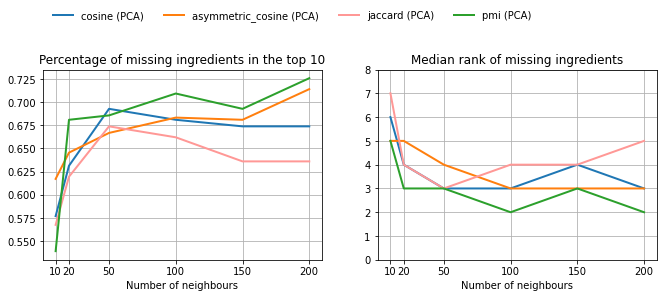

In [13]:
top10_pca       = results_PCA['recall10']
# top10           = results    ['top10_presence']
median_pca      = results_PCA['median_rank']
# median          = results    ['median_rank']

color_sequence = ['#1f77b4', '#ff7f0e', '#ff9896', '#2ca02c']

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(11, 3.5))

for sim, color in zip(similarity_measures, color_sequence):
    ax[0].plot(k_grid, top10_pca.loc[results_PCA['similarity_measure'] == sim], color, 
             linewidth = 2, label = sim + ' (PCA)')
    # ax[0].plot(k_grid, top10.loc[results['similarity_measure'] == sim], color, linewidth = 2, 
    #          linestyle = "--", label = sim)
    ax[1].plot(k_grid, median_pca.loc[results_PCA['similarity_measure'] == sim], color, 
               linewidth = 2, label = sim + ' (PCA)')
    # ax[1].plot(k_grid, median.loc[results['similarity_measure'] == sim], color, linewidth = 2, 
    #          linestyle = "--", label = sim)

ax[1].set_ylim((0,8))

for i in [0,1]:
    ax[i].grid(); 
    ax[i].set_xlabel('Number of neighbours')


ax[0].set_title("Percentage of missing ingredients in the top 10")
ax[1].set_title("Median rank of missing ingredients")

ax[1].set_xticks(k_grid)

handles, labels = ax[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', frameon=False, ncol=4, bbox_to_anchor = (0.44,1.15))

plt.show()
fig.savefig('plots/k_tuning.pdf', bbox_inches="tight")

## Run all similarity metrics with best k and PCA (50)

In [14]:
results_model_sel = pd.DataFrame(columns = ["k", "similarity_measure", "recall10", 
                                            "mean_rank", "median_rank"])
k_grid              = [100] # was 50
similarity_measures = ["cosine", "asymmetric_cosine", "jaccard", "pmi"]
n_recommendations   = len(X.columns)
user_item_matrix    = X_test

for sim in similarity_measures:
    
    model_config = [k_grid, sim, n_recommendations]
    missing_ingredients, recommendations = held_out_recommendation(user_item_matrix, model_config, usePCA = True)
    
    for k, recs in recommendations.items():
        results_model_sel = results_model_sel.append(calculate_metrics(missing_ingredients, recs, k, sim), 
                            ignore_index = True)

se `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  pmi.values[[range(pmi.shape[0])]*2] = 0 # Set self-PMI to zero.
x:\DME\Bag-of-Recipes-master\similarity_functions.py:68: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  pmi.values[[range(pmi.shape[0])]*2] = 0 # Set self-PMI to zero.
x:\DME\Bag-of-Recipes-master\similarity_functions.py:68: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  pmi.values[[range(pmi.sh

In [5]:
results_model_sel # with k =200

,k,similarity_measure,recall10,mean_rank,median_rank
0,200,cosine,0.492476,37.8595,10
1,200,asymmetric_cosine,0.523458,44.7244,9
2,200,jaccard,0.519327,36.1711,9
3,200,pmi,0.534081,48.7722,8


## Sample predictions from our best model

In [19]:
n       = X.shape[1] # surely 1??
pca     = PCA(n_components = n) # changed to 2 from n to make this work
X_pca_T = pca.fit_transform(X.T)
X_pca   = pd.DataFrame(X_pca_T.T, columns = X.columns)

In [20]:
recommendations = recommend_ingredients(X, X_pca, similarity_measure = "pmi", k = 200) # TODO k was 50 before

x:\DME\Bag-of-Recipes-master\similarity_functions.py:68: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  pmi.values[[range(pmi.shape[0])]*2] = 0 # Set self-PMI to zero.


In [ ]:
recipe1 = 3
recipe2 = 500

print('Recipe {} ({}): \n{}\n'.format(X.index[recipe1], 
                                      cuisines.iloc[recipe1, 0],
                                      X.columns[np.where(X.iloc[recipe1,] != 0)]))
print('Recommended ingredients: \n{}\n\n'.format(recommendations[100][recipe1,]))

print('Recipe {} ({}): \n{}\n'.format(X.index[recipe2], 
                                      cuisines.iloc[recipe2, 0],
                                      X.columns[np.where(X.iloc[recipe2,] != 0)]))
print('Recommended ingredients: \n{}\n\n'.format(recommendations[100][recipe2,]))